#Using Keras

##AA

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [0]:
data=np.random.random(((1000,100,100,1)))

In [0]:
labels=np.random.random((1000,40))
for j in range(labels.shape[0]):
  for i in range(labels.shape[1]):
    if labels[j][i]>0.5:
      labels[j][i]=1
    else :
      labels[j][i]= 0 

In [0]:
labels

array([[1., 1., 1., ..., 0., 1., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 1.],
       ...,
       [1., 1., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 1., 1., 1.]])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=2, test_size=0.2)

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(100,100,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(40, activation='sigmoid'))

In [0]:
#model.summary()

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=100)

Train on 800 samples, validate on 200 samples
Epoch 1/5
800/800 [==============================] - 7s 9ms/step - loss: 0.6955 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.5060
Epoch 2/5
800/800 [==============================] - 0s 491us/step - loss: 0.6931 - accuracy: 0.5006 - val_loss: 0.6931 - val_accuracy: 0.5045
Epoch 3/5
800/800 [==============================] - 0s 496us/step - loss: 0.6931 - accuracy: 0.5106 - val_loss: 0.6931 - val_accuracy: 0.5065
Epoch 4/5
800/800 [==============================] - 0s 494us/step - loss: 0.6930 - accuracy: 0.5086 - val_loss: 0.6931 - val_accuracy: 0.5065
Epoch 5/5
800/800 [==============================] - 0s 495us/step - loss: 0.6930 - accuracy: 0.5125 - val_loss: 0.6931 - val_accuracy: 0.5082


In [0]:
a=np.random.random((((1,100,100,1))))
b=np.random.random((((1,100,100,1))))
print(model.predict(a)-model.predict(b))

[[-2.65240669e-05  1.15036964e-05 -3.07559967e-05  5.78165054e-05
  -6.45518303e-05 -5.76078892e-05 -5.42402267e-06  7.32243061e-05
   4.81009483e-05 -1.90734863e-06  1.07884407e-05 -5.28693199e-05
  -5.34653664e-05  5.09023666e-05  6.87837601e-05  7.22706318e-05
  -6.24358654e-05 -8.94069672e-07 -4.47034836e-06 -1.06096268e-05
   1.66893005e-06 -6.86645508e-05  1.09672546e-05 -2.77459621e-05
   1.78813934e-06  1.04904175e-05 -6.49690628e-05  2.19941139e-05
  -3.08156013e-05 -5.59985638e-05 -1.56164169e-05 -3.00407410e-05
  -2.44379044e-05  6.27636909e-05  2.37226486e-05  2.93850899e-05
   4.67300415e-05  8.86917114e-05  1.94013119e-05  8.10623169e-06]]


##2


In [0]:
data=np.random.random(((1000,50,50,1)))

In [0]:
labels=np.random.random((1000,20))
for j in range(labels.shape[0]):
  for i in range(labels.shape[1]):
    if labels[j][i]>0.5:
      labels[j][i]=1
    else :
      labels[j][i]= 0 

In [0]:
model = Sequential()
model.add(Conv2D(filters=8,   kernel_size=(5), activation="relu", input_shape=(50,50,1)))
model.add(Conv2D(filters=16,  kernel_size=(5), activation="relu",padding='valid',use_bias='True'))
model.add(Conv2D(filters=32,  kernel_size=(5), activation='relu',padding='valid',use_bias='True'))
model.add(Conv2D(filters=64,  kernel_size=(5), activation="relu",padding='valid',use_bias='True'))
model.add(Conv2D(filters=128, kernel_size=(5), activation="relu",padding='valid',use_bias='True'))
model.add(Conv2D(filters=256, kernel_size=(5), activation="relu",padding='valid',use_bias='True'))
model.add(Conv2D(filters=128, kernel_size=(5), activation="relu",padding='valid',use_bias='True'))
model.add(Conv2D(filters=64,  kernel_size=(5), activation="relu",padding='valid',use_bias='True'))
model.add(Conv2D(filters=32,  kernel_size=(5), activation="relu",padding='valid',use_bias='True'))
model.add(MaxPooling2D(pool_size=(5, 5)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(20, activation='sigmoid'))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=2, test_size=0.3)

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
a=model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=500)

Train on 700 samples, validate on 300 samples
Epoch 1/50
700/700 [==============================] - 18s 26ms/step - loss: 0.6932 - accuracy: 0.5009 - val_loss: 0.6931 - val_accuracy: 0.4967
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5010 - val_loss: 0.6940 - val_accuracy: 0.4977
Epoch 3/50
700/700 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.5063 - val_loss: 0.6933 - val_accuracy: 0.4950
Epoch 4/50
700/700 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5069 - val_loss: 0.6937 - val_accuracy: 0.4950
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5066 - val_loss: 0.6939 - val_accuracy: 0.4935
Epoch 6/50
700/700 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5095 - val_loss: 0.6938 - val_accuracy: 0.4895
Epoch 7/50
700/700 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5101 

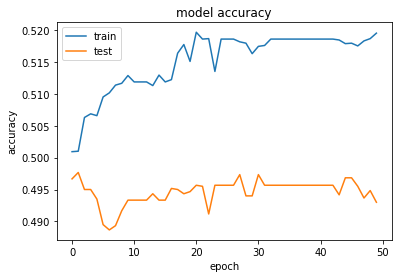

In [0]:
plt.plot(a.history['accuracy'])
plt.plot(a.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[[0.5705849  0.55012333 0.50382704 0.52007157 0.4865775  0.52365154
  0.44156843 0.5389698  0.521355   0.5089127  0.49315548 0.5365754
  0.46519262 0.48628333 0.47167617 0.4859805  0.46121064 0.4910882
  0.5138011  0.46855846]]


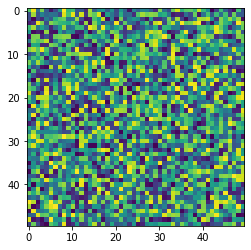

In [0]:
val=np.random.random((((1,50 ,50,1))))
plt.imshow(val[0].squeeze(2))
print(model.predict(val))

##1D CNN KERAS


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [0]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.fig = plt.figure() 
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('accuracy'))
        self.val_losses.append(logs.get('val_accuracy'))
        self.i += 1
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="accuracy")
        plt.plot(self.x, self.val_losses, label="val_accuracy")
        plt.legend()
        plt.show();
plot_accuracy = Plotacc()

NameError: ignored

In [0]:
data=np.random.random((1000,1000,1))

(array([  5.,  14.,  41., 193., 160., 160., 284.,  74.,  50.,  19.]),
 array([ 3. ,  4.3,  5.6,  6.9,  8.2,  9.5, 10.8, 12.1, 13.4, 14.7, 16. ]),
 <a list of 10 Patch objects>)

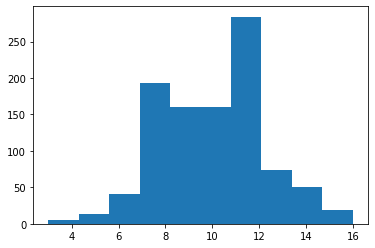

In [0]:
labels=np.random.random((1000,20))
for j in range(labels.shape[0]):
  for i in range(labels.shape[1]):
    if labels[j][i]>0.5:
      labels[j][i]=1
    else :
      labels[j][i]= 0 
graph=np.sum(labels,axis=1)
plt.hist(graph)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=1, test_size=0.2)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(900, 1000, 1) (900, 20) (100, 1000, 1) (100, 20)


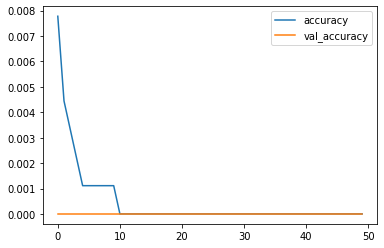

In [0]:
model = Sequential()
model.add(Conv1D(filters=8,   kernel_size=8, activation="relu", input_shape=(X_train.shape[1],1)))
model.add(Conv1D(filters=16,  kernel_size=8, activation="relu",padding='valid',use_bias='True'))
model.add(Conv1D(filters=32,  kernel_size=8, activation='relu',padding='valid',use_bias='True'))
model.add(Conv1D(filters=64,  kernel_size=8, activation="relu",padding='valid',use_bias='True'))
model.add(Conv1D(filters=128, kernel_size=8, activation="relu",padding='valid',use_bias='True'))
model.add(Conv1D(filters=256, kernel_size=8, activation="relu",padding='valid',use_bias='True'))
model.add(Conv1D(filters=128, kernel_size=8, activation="relu",padding='valid',use_bias='True'))
model.add(Conv1D(filters=64,  kernel_size=8, activation="relu",padding='valid',use_bias='True'))
model.add(Conv1D(filters=32,  kernel_size=8, activation="relu",padding='valid',use_bias='True'))
model.add(MaxPooling1D(pool_size=5))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(20, activation='sigmoid'))
sgd = SGD(lr=0.001)#, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
a=model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),callbacks=[plot_accuracy], batch_size=200,shuffle='True',use_multiprocessing='True',verbose=0)

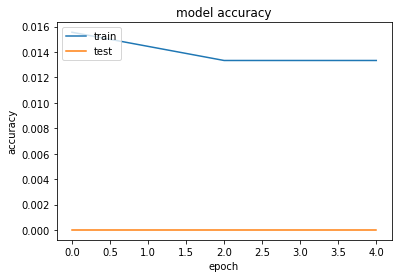

In [0]:
plt.plot(a.history['accuracy'])
plt.plot(a.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from matplotlib import pyplot
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, n_filters):
  model = Sequential()
  model.add(Conv1D(filters=8,   kernel_size=8, activation="relu", input_shape=(trainX.shape[1],1)))
  model.add(Conv1D(filters=16,  kernel_size=8, activation="relu",padding='valid',use_bias='True'))
  model.add(Conv1D(filters=32,  kernel_size=8, activation='relu',padding='valid',use_bias='True'))
  model.add(Conv1D(filters=64,  kernel_size=8, activation="relu",padding='valid',use_bias='True'))
  model.add(Conv1D(filters=128, kernel_size=8, activation="relu",padding='valid',use_bias='True'))
  model.add(Conv1D(filters=256, kernel_size=8, activation="relu",padding='valid',use_bias='True'))
  model.add(Conv1D(filters=128, kernel_size=8, activation="relu",padding='valid',use_bias='True'))
  model.add(Conv1D(filters=64,  kernel_size=8, activation="relu",padding='valid',use_bias='True'))
  model.add(Conv1D(filters=32,  kernel_size=8, activation="relu",padding='valid',use_bias='True'))
  model.add(MaxPooling1D(pool_size=5))
  model.add(Flatten())
  model.add(Dense(32, activation='relu'))
  model.add(Dense(20, activation='sigmoid'))
  sgd = SGD(lr=0.001)#, decay=1e-6, momentum=0.9, nesterov=True)
  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  model.fit(trainX, trainy, epochs=5, validation_data=(testX, testy), batch_size=200,shuffle='True',use_multiprocessing='True',verbose=0)
  a,accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
  return accuracy
 
# summarize scores
def summarize_results(scores, params):
	print(scores, params)
	# summarize mean and standard deviation
	for i in range(len(scores)):
		m, s = mean(scores[i]), std(scores[i])
		print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
	# boxplot of scores
	pyplot.boxplot(scores, labels=params)
	pyplot.savefig('exp_cnn_filters.png')
 
# run an experiment
def run_experiment(params, repeats=10):
	# load data
	X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=1, test_size=0.2)
	# test each parameter
	all_scores = list()
	for p in params:
		# repeat experiment
		scores = list()
		for r in range(repeats):
			score = evaluate_model(X_train, X_test, y_train, y_test, p)
			score = score * 100.0
			print('>p=%d #%d: %.3f' % (p, r+1, score))
			scores.append(score)
		all_scores.append(scores)
	# summarize results
	summarize_results(all_scores, params)
 
# run the experiment
n_params = [8, 16, 32, 64, 128, 256]
run_experiment(n_params)

ValueError: ignored

#Using Pytorch

In [0]:
import torch.nn as nn 
import torch 
import torchvision.datasets as dsets
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F

In [0]:
class PrepData(Dataset):
  def __init__(self,images,labels):
    self.image=images
    self.label=labels
  def __len__(self):
    return len(self.image)
  def __getitem__(self,index):
    data = self.image[index]
    data=data.unsqueeze(0)
    return (data,self.label[index])

In [0]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=1, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()
        #self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(in_features=28, out_features=20,bias=True) 

    def forward(self, x):
        out = self.relu1(self.cnn1(x))
        out = self.relu2(self.cnn2(out))
        #out = self.maxpool1(out)
        #out = out.view(out.size(0), -1)
        out = self.fc1(out)
        return out

In [0]:
def training(train_loader,test_loader,optimizer,criterion,neuron):
 iter = 0
 for epoch in (range(2)):
    for i, (images, labels) in enumerate(train_loader):
        images = images.requires_grad_()
        optimizer.zero_grad()

        outputs = neuron(images.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter += 1

    correct = 0
    total = 0

    for images, labels in test_loader:
        images = images.requires_grad_()
        outputs = neuron(images.float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
        accuracy = 100 * correct / total
    print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

In [0]:
def model_prep(train,test,train_labels,test_labels):
  neuron=CNN()
  criterion=nn.BCEWithLogitsLoss()
  optimizer=optim.SGD(neuron.parameters(),1e-1, momentum = 0.9,weight_decay = 1e-5)
  train_data=PrepData(train,train_labels[0])
  test_data=PrepData(test,test_labels[0])
  train_loader = DataLoader(dataset=train_data,batch_size=5,shuffle=True)
  test_loader=DataLoader(dataset=test_data,batch_size=5,shuffle=False)
  a,b=next(iter(test_loader))
  print(a.shape,b.shape)
  training(train_loader,test_loader,optimizer,criterion,neuron)

In [0]:
import matplotlib.pyplot as plt
data=torch.rand(50,28,28)
#print(data)
plt.imshow(data[1])

In [0]:
labels=torch.rand(50,20)
for j in range(labels.shape[0]):
  for i in range(labels.shape[1]):
    if labels[j][i]>0.5:
      labels[j][i]=1
    else :
      labels[j][i]= 0 

In [0]:
train,test=data[:39],data[39+1:]
train_labels,test_labels=labels[:39],labels[39+1:]
print(train.shape,train_labels.shape)
print(test.shape,test_labels.shape)

In [0]:
model_prep(train,test,train_labels,test_labels)

#Single label class

In [0]:
import csv
import h5py
import pandas as pd
import torch 
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn 
import torchvision.datasets as dsets
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt

In [0]:
class PrepData(Dataset):
  def __init__(self,images,labels):
    self.image=images
    self.label=labels
  def __len__(self):
    return len(self.image)
  def __getitem__(self,index):
    data = self.image[index]
    data=data.unsqueeze(0)
    return (data,self.label[index])

In [0]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()        
        self.cnn3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.relu3 = nn.ReLU()  
        self.cnn4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2)
        self.relu4 = nn.ReLU()  
        self.cnn5 = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=5, stride=1, padding=2)
        self.relu5 = nn.ReLU()  
        
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        self.cnn6 = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu6 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(in_features=224, out_features=10,bias=True) 

    def forward(self, x):
        out = self.relu1(self.cnn1(x))
        out = self.relu2(self.cnn2(out))
        out = self.relu3(self.cnn3(out))
        out = self.relu4(self.cnn4(out))
            
        out = self.maxpool1(self.relu5(self.cnn5(out)))
        out = self.maxpool2(self.relu6(self.cnn6(out)))
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        return out

In [0]:
def training(train_loader,test_loader,optimizer,criterion,neuron):
 y=np.zeros(120)
 iter = 0
 for epoch in tqdm(range(5)):
    for i, (images, labels) in enumerate(train_loader):
        images = images.requires_grad_()
        optimizer.zero_grad()

        outputs = neuron(images.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        iter += 1

    correct = 0
    total = 0

    for images, labels in test_loader:
        images = images.requires_grad_()
        outputs = neuron(images.float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
        accuracy = 100 * correct / total
    #print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))
    y[epoch]=accuracy
 plt.plot(y)
 plt.show()
#----------------------------------------------------------------------
def model_prep(train,test,train_labels,test_labels):
 neuron=CNN()
 criterion=nn.CrossEntropyLoss()
 optimizer=optim.SGD(neuron.parameters(),1e-3)
 train_data=PrepData(train,train_labels)
 test_data=PrepData(test,test_labels)
 train_loader = DataLoader(dataset=train_data,batch_size=100,shuffle=True)
 test_loader=DataLoader(dataset=test_data,batch_size=100,shuffle=False)
 a,b=next(iter(test_loader))
 print(a.shape,b.shape)
 training(train_loader,test_loader,optimizer,criterion,neuron)
#----------------------------------------------------------------------

if __name__ == '__main__':
 data=torch.from_numpy(np.random.random((5000,5,28)))
 data_labels=torch.from_numpy(np.random.randint(10,size=5000))
 print(data.shape,type(data))

 train,test=data[:4000,:],data[4001:,:]
 train_labels,test_labels=data_labels[:4000],data_labels[4001:]
 #plt.imshow(train[0])
 #plt.show()
 #train,test=train.unsqueeze(1),test.unsqueeze(1)
 print("train:",train.shape,train_labels.shape,'\n',"test:",test.shape,test_labels.shape)
 model_prep(train,test,train_labels,test_labels)


#Check multiclass

In [0]:
model = nn.Linear(20, 5) # predict logits for 5 classes
x = torch.randn(1, 20)
y = torch.tensor([[1., 0., 1., 0., 0.]]) # get classA and classC as active

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-1)

for epoch in range(5):
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    print('Loss: {:.3f}'.format(loss.item()))

In [0]:
model = nn.Linear(2000, 43) # predict logits for 5 classes
x = torch.randn(5000, 2000)
y=torch.rand((5000,43))
for i in range(5000):
  y[i]=torch.from_numpy(np.random.randint(0,2,43))

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

for epoch in range(500):
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    if epoch%50==0:
      print('Loss: {:.3f}'.format(loss.item()))

In [0]:
a=torch.rand(1,2000)
model(a)

In [0]:
model = nn.Sequential(nn.Conv1d(1,1,2,1) , nn.Linear(20, 20)) # predict logits for 5 classes
x = torch.randn(50,1,20)
y=torch.rand(50,20)
for i in range(50):
  y[i]=torch.from_numpy(np.random.randint(0,2,20))
print(x.shape,y.shape)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

for epoch in range(500):
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    if epoch%50==0:
      print('Loss: {:.3f}'.format(loss.item()))

# Use TPUs
https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/tpu.ipynb#scrollTo=dKPqF8d1wJCV
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/guide/tpu"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/tpu.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/guide/tpu.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/guide/tpu.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In [0]:
import tensorflow as tf

import os
import tensorflow_datasets as tfds

In [0]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
#print("All devices: ", tf.config.list_logical_devices('TPU'))
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.20.188.42:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.20.188.42:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


In [0]:
def create_model():
  return tf.keras.Sequential(
      [tf.keras.layers.Conv2D(256, 3, activation='relu', input_shape=(28, 28, 1)),
       tf.keras.layers.Conv2D(256, 3, activation='relu'),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(256, activation='relu'),
       tf.keras.layers.Dense(128, activation='relu'),
       tf.keras.layers.Dense(10)])

In [0]:
import numpy as np

In [0]:
X=tf.convert_to_tensor(np.random.random((60000,28,28)))
Y=np.zeros((60000,10))
for i in range(Y.shape[0]):
  Y[i][np.random.randint(0,Y.shape[1]-1,dtype=int)]=1

In [0]:
data=tf.data.Dataset.from_tensors(X)
labels=tf.data.Dataset.from_tensors(Y)

In [0]:
#tf.data.Dataset.shuffle(1000)
#tf.data.Dataset.repeat

In [0]:
#labels=np.zeros((60000,10))
#for i in range(labels.shape[0]):
#  labels[i][np.random.randint(0,labels.shape[1]-1,dtype=int)]=1

In [0]:
def get_dataset(batch_size, is_training=True):
  split = 'train' if is_training else 'test'
  dataset, info = tfds.load(name='mnist', split=split, with_info=True,
                            as_supervised=True, try_gcs=True)

  def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.0

    return image, label

  dataset = dataset.map(scale)

  # Only shuffle and repeat the dataset in training. The advantage to have a
  # infinite dataset for training is to avoid the potential last partial batch
  # in each epoch, so users don't need to think about scaling the gradients
  # based on the actual batch size.
  if is_training:
    dataset = dataset.shuffle(10000)
    dataset = dataset.repeat()

  dataset = dataset.batch(batch_size)

  return dataset

In [0]:
#def get_dataset(batch_size, is_training=True):
#  split = 'train' if is_training else 'test'
#  dataset = data,labels
#
#  if is_training:
#    dataset = dataset.shuffle(10000)
#    dataset = dataset.repeat()
#
#  dataset = dataset.batch(batch_size)
#  return dataset

In [0]:
with strategy.scope():
  model = create_model()
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['sparse_categorical_accuracy'])

batch_size = 200
steps_per_epoch = 60000 // batch_size

train_dataset = get_dataset(batch_size, is_training=True)
test_dataset = get_dataset(batch_size, is_training=False)

model.fit(train_dataset,epochs=5,steps_per_epoch=steps_per_epoch,validation_data=test_dataset)

Epoch 1/5
300/300 [==============================] - 12s 39ms/step - sparse_categorical_accuracy: 0.9577 - loss: 0.1353 - val_sparse_categorical_accuracy: 0.9828 - val_loss: 0.0557
Epoch 2/5
300/300 [==============================] - 9s 29ms/step - sparse_categorical_accuracy: 0.9899 - loss: 0.0334 - val_sparse_categorical_accuracy: 0.9852 - val_loss: 0.0510
Epoch 3/5
300/300 [==============================] - 9s 30ms/step - sparse_categorical_accuracy: 0.9940 - loss: 0.0179 - val_sparse_categorical_accuracy: 0.9868 - val_loss: 0.0487
Epoch 4/5
300/300 [==============================] - 9s 30ms/step - sparse_categorical_accuracy: 0.9955 - loss: 0.0133 - val_sparse_categorical_accuracy: 0.9868 - val_loss: 0.0454
Epoch 5/5
300/300 [==============================] - 9s 30ms/step - sparse_categorical_accuracy: 0.9971 - loss: 0.0086 - val_sparse_categorical_accuracy: 0.9878 - val_loss: 0.0472


In [0]:
model.history.history['sparse_categorical_accuracy']

[0.9577333331108093,
 0.9899333715438843,
 0.9940333366394043,
 0.9955000281333923,
 0.9970999956130981]

In [0]:
# Create the model, optimizer and metrics inside strategy scope, so that the
# variables can be mirrored on each device.
with strategy.scope():
  model = create_model()
  optimizer = tf.keras.optimizers.Adam()
  training_loss = tf.keras.metrics.Mean('training_loss', dtype=tf.float32)
  training_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(
      'training_accuracy', dtype=tf.float32)

# Calculate per replica batch size, and distribute the datasets on each TPU
# worker.
per_replica_batch_size = batch_size // strategy.num_replicas_in_sync

train_dataset = strategy.experimental_distribute_datasets_from_function(
    lambda _: get_dataset(per_replica_batch_size, is_training=True))

@tf.function
def train_step(iterator):
  """The step function for one training step"""

  def step_fn(inputs):
    """The computation to run on each TPU device."""
    images, labels = inputs
    with tf.GradientTape() as tape:
      logits = model(images, training=True)
      loss = tf.keras.losses.sparse_categorical_crossentropy(
          labels, logits, from_logits=True)
      loss = tf.nn.compute_average_loss(loss, global_batch_size=batch_size)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(list(zip(grads, model.trainable_variables)))
    training_loss.update_state(loss * strategy.num_replicas_in_sync)
    training_accuracy.update_state(labels, logits)

  strategy.run(step_fn, args=(next(iterator),))

In [0]:
steps_per_eval = 10000 // batch_size

train_iterator = iter(train_dataset)
for epoch in range(5):
  print('Epoch: {}/5'.format(epoch))

  for step in range(steps_per_epoch):
    train_step(train_iterator)
  print('Current step: {}, training loss: {}, accuracy: {}%'.format(
      optimizer.iterations.numpy(),
      round(float(training_loss.result()), 4),
      round(float(training_accuracy.result()) * 100, 2)))
  training_loss.reset_states()
  training_accuracy.reset_states()

In [0]:
@tf.function
def train_multiple_steps(iterator, steps):
  """The step function for one training step"""

  def step_fn(inputs):
    """The computation to run on each TPU device."""
    images, labels = inputs
    with tf.GradientTape() as tape:
      logits = model(images, training=True)
      loss = tf.keras.losses.sparse_categorical_crossentropy(
          labels, logits, from_logits=True)
      loss = tf.nn.compute_average_loss(loss, global_batch_size=batch_size)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(list(zip(grads, model.trainable_variables)))
    training_loss.update_state(loss * strategy.num_replicas_in_sync)
    training_accuracy.update_state(labels, logits)

  for _ in tf.range(steps):
    strategy.run(step_fn, args=(next(iterator),))

# Convert `steps_per_epoch` to `tf.Tensor` so the `tf.function` won't get 
# retraced if the value changes.
train_multiple_steps(train_iterator, tf.convert_to_tensor(steps_per_epoch))

print('Current step: {}, training loss: {}, accuracy: {}%'.format(
      optimizer.iterations.numpy(),
      round(float(training_loss.result()), 4),
      round(float(training_accuracy.result()) * 100, 2)))